<a href="https://colab.research.google.com/github/ffreirea1988/usm/blob/main/Clustering_K_Means_y_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
#Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#**K-Means**

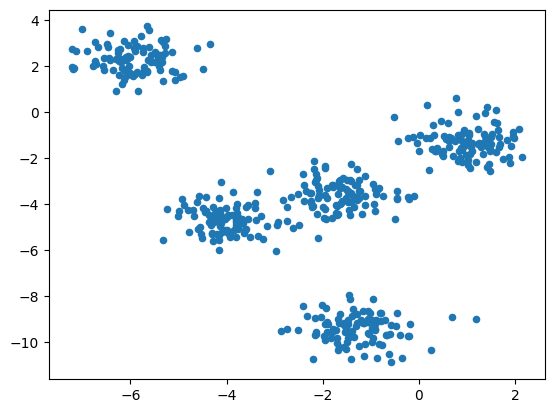

In [2]:
#Creamos un dataset sintético (de mentira)
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=500, centers=5,
                       cluster_std=0.60, random_state=2)
plt.scatter(X[:, 0], X[:, 1], s=20)

In [3]:
#Librería K-Means
#Definimos el número de clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

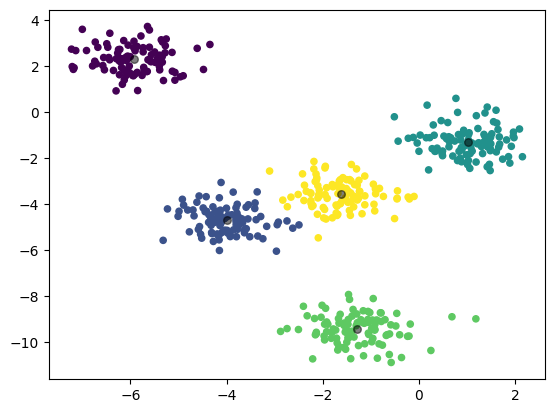

In [4]:
#Gráficamos los centroides y diferenciamos los clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=30, alpha=0.5)

#**DBSCAN**

In [162]:
#Librería DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_blobs

In [163]:
#Creamos un dataset ficticio
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.3, random_state=0
)

In [164]:
#Normalizamos las distancias de los datos
X = StandardScaler().fit_transform(X)

In [177]:
#Generamos el modelo, indicando el epsilon y el min_samples:
db = DBSCAN(eps=0.2, min_samples=15).fit(X)

In [178]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

labels = db.labels_

# Número de clusters en las etiquetas ignorando el ruido presente
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
ruido = list(labels).count(-1)
print("Estimado número de cluster: ", num_clusters)
print("Estimado número de puntos ruidosos: ", ruido)

Estimado número de cluster:  3
Estimado número de puntos ruidosos:  66


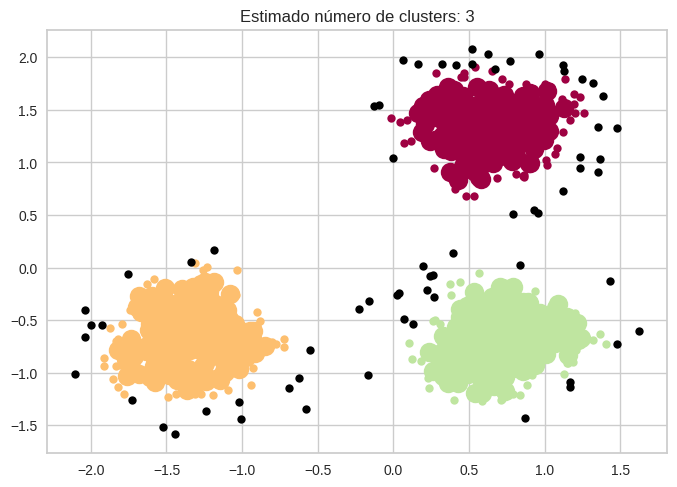

In [179]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimado número de clusters: %d" % n_clusters_)
plt.show()

#**Ejemplo aplicado**

In [180]:
#Utilizamos un dataset desde la librería sklearn:
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing(as_frame=True)

In [181]:
#Trabajamos los datos para verlos como dataframe con numpy
data = np.c_[df.data, df.target]
columns = np.append(df.feature_names, ["target"])

In [182]:
#Definimos nuestro dataframe
df=pd.DataFrame(data, columns=columns)

In [183]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [80]:
df.shape

(20640, 9)

In [79]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

In [184]:
#Consideraremos 3 variables:
X = np.array(df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target']])

In [185]:
#Importamos librería K-Means
from sklearn.cluster import KMeans

#Importamos una nueva librería: Yellowbrick
from yellowbrick.cluster import KElbowVisualizer

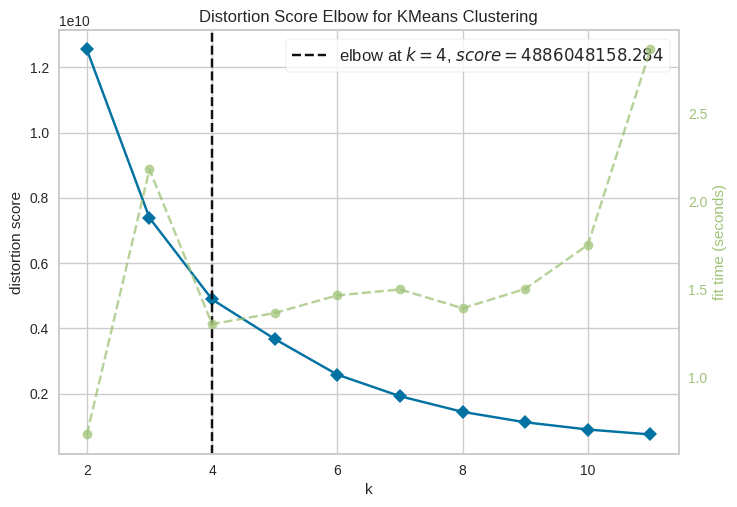

In [137]:
#Generamos el método Elbow para ver cuántos clusters generar en K-means
modelo = KMeans(random_state=1)
visualizer = KElbowVisualizer(modelo, k=(2,12))
visualizer.fit(X)
visualizer.show()
plt.show()

###Luego, en base al método Elbow es preferible agrupar en 4 clusters el modelo

In [138]:
#Instanciamos el modelo con 4 clusters
#K-means es un modelo de partición de cluster, por lo que definimos el número de estos:
km_4_clusters = KMeans(n_clusters=4)
#KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

In [139]:
#Hacemos fit
km_4_clusters.fit(X)

KMeans(n_clusters=4)

In [140]:
km_4_clusters.labels_

array([0, 2, 0, ..., 0, 0, 2], dtype=int32)

In [141]:
km_4_clusters.cluster_centers_

array([[ 3.91943712e+00,  3.16238581e+01,  5.63276041e+00,
         1.12300383e+00,  7.86889756e+02,  2.79776960e+00,
         3.58498741e+01, -1.19744857e+02,  2.11187696e+00],
       [ 3.84293143e+00,  2.03158453e+01,  5.12477609e+00,
         1.06989539e+00,  3.36746582e+03,  3.60214393e+00,
         3.51830525e+01, -1.19161638e+02,  2.01597642e+00],
       [ 3.78687364e+00,  2.66763325e+01,  5.18348251e+00,
         1.06335472e+00,  1.70920671e+03,  3.06838456e+00,
         3.54230655e+01, -1.19419477e+02,  2.01580424e+00],
       [ 4.33409110e+00,  1.28559322e+01,  5.66079775e+00,
         1.07542145e+00,  7.69989407e+03,  1.19278970e+01,
         3.52119915e+01, -1.19074492e+02,  2.03824589e+00]])

In [142]:
#Generamos los clusters
y_kmeans = km_4_clusters.predict(X)

In [143]:
y_kmeans

array([0, 2, 0, ..., 0, 0, 2], dtype=int32)

In [148]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

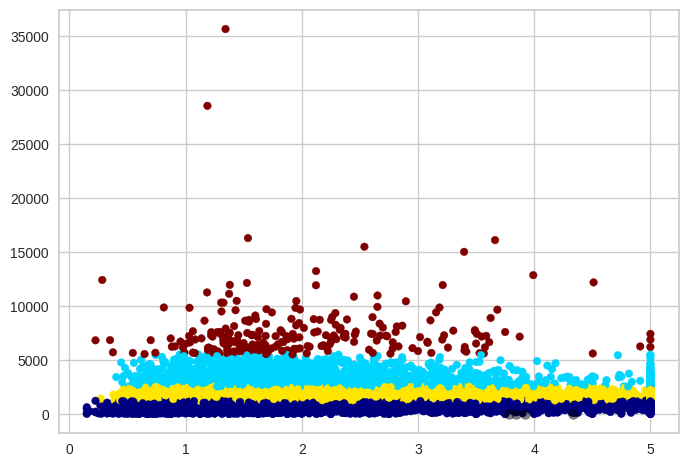

In [160]:
#Gráficamos los centroides y diferenciamos los clusters
plt.scatter(df['target'], df['Population'], c=y_kmeans, s=30, cmap='jet')

#centers = km_4_clusters.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5)